
**Initializing the dataset**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp -r /content/drive/My\ Drive/MAFA /content/


^C


In [ ]:
%cd /content/drive/My Drive/MAFA/
!unzip train-images.zip
!unzip MAFA-Label-Train.zip

/content/drive/My Drive/MAFA
Archive:  train-images.zip
Archive:  MAFA-Label-Train.zip
replace LabelTrainAll.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

!unzip test-images.zip
!unzip MAFA-Label-Test.zip

Archive:  test-images.zip
Archive:  MAFA-Label-Test.zip
replace LabelTestAll.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import scipy.io
matTrain = scipy.io.loadmat('/content/drive/My Drive/MAFA/LabelTrainAll.mat')
matTest = scipy.io.loadmat('/content/drive/My Drive/MAFA/LabelTestAll.mat')

In [ ]:

print(matTrain.keys())
print(matTest.keys())

dict_keys(['__header__', '__version__', '__globals__', 'label_train'])
dict_keys(['__header__', '__version__', '__globals__', 'LabelTest'])


**EXTRACT TRAIN SET**

In [ ]:
#Read train
label_train = matTrain['label_train']
print(label_train.dtype)
print(label_train.shape,label_train.size)
print(label_train[0,0]['imgName'],label_train[0,0]['label'])
imgName = label_train[0]['imgName']
label = label_train[0]['label']

[('orgImgName', 'O'), ('imgName', 'O'), ('label', 'O')]
(1, 25876) 25876
['train_00000001.jpg'] [[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [ ]:
print(imgName[0])
print(label[0])

['train_00000001.jpg']
[[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [ ]:
n = [0,0,0,0]
for i in range(label.size):
  t = label[i][0][12]
  n[t]=n[t]+1
print(n)

[0, 12730, 11126, 2020]


In [ ]:
#write train set
import cv2
import numpy as np
import os 
pathIn = '/content/drive/My Drive/MAFA/images'
pathOut = '/content/drive/My Drive/MAFA-Crop/train'
numM1, numM2, numN = 0, 0, 0
index = 1
for i in range(label.size):
  img_name = os.path.join(pathIn, imgName[i][0])
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[int(y):int(y+int(h)), int(x):int(x+int(w))]
  img_label = label[i][0][12]
  if img_label == 1:
    numM1 += 1
    if numM1 > 1000: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 1000: continue
    img_label = 'M'
  else: 
    numN += 1
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)

KeyboardInterrupt: ignored

In [ ]:
%cd /content/drive/My Drive/MAFA-Crop/train
!ls
print(index)

/content/drive/My Drive/MAFA-Crop/train
 M_1000.jpg	   M_1788.jpg   M_640.jpg    N_2420.jpg   N_3226.jpg
 M_1001.jpg	   M_1789.jpg   M_641.jpg    N_2421.jpg   N_3227.jpg
 M_1002.jpg	   M_178.jpg    M_642.jpg    N_2422.jpg   N_3228.jpg
 M_1003.jpg	   M_1790.jpg   M_643.jpg    N_2423.jpg   N_3229.jpg
 M_1004.jpg	   M_1791.jpg   M_644.jpg    N_2424.jpg   N_3230.jpg
 M_1005.jpg	   M_1792.jpg   M_645.jpg    N_2425.jpg   N_3231.jpg
 M_1006.jpg	   M_1793.jpg   M_646.jpg    N_2426.jpg   N_3232.jpg
 M_1007.jpg	   M_1794.jpg   M_647.jpg    N_2427.jpg   N_3233.jpg
 M_1008.jpg	   M_1795.jpg   M_648.jpg    N_2428.jpg   N_3234.jpg
 M_1009.jpg	   M_1796.jpg   M_649.jpg    N_2429.jpg   N_3235.jpg
 M_100.jpg	   M_1797.jpg   M_64.jpg     N_2430.jpg   N_3236.jpg
 M_1010.jpg	   M_1798.jpg   M_650.jpg    N_2431.jpg   N_3237.jpg
 M_1011.jpg	   M_1799.jpg   M_651.jpg    N_2432.jpg   N_3238.jpg
 M_1012.jpg	   M_179.jpg    M_652.jpg    N_2433.jpg   N_3239.jpg
 M_1013.jpg	   M_17.jpg     M_653.jpg    N_2434.jpg

**EXTRACT TEST SET**

In [ ]:
label_test = matTest['LabelTest']
print(label_test.dtype)
print(label_test.shape,label_test.size)
print(label_test[0,0]['name'],label_test[0,0]['label'])
imgName = label_test[0]['name']
label = label_test[0]['label']

[('name', 'O'), ('label', 'O')]
(1, 4935) 4935
['test_00000001.jpg'] [[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


In [ ]:
print(imgName[0])
print(label[0])

['test_00000001.jpg']
[[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


#**IMPORT** 

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install Pillow
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 151kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
# defines

DIR_IMG_TRAIN = '/content/drive/My Drive/MAFA-Crop/train/'
DIR_IMG_TEST = '/content/drive/My Drive/MAFA-Crop/test/'
DIR_TMP_DATA = '/content/drive/My Drive/checkpoints'
DIR_OUTPUT = '/content/drive/My Drive/MAFA-Crop/models/'

IMG_SHAPE = (150,150,3)

In [ ]:
# import
import os
import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import time

# **EXPLORING THE DATA**

Image have shape: (91, 91, 3)


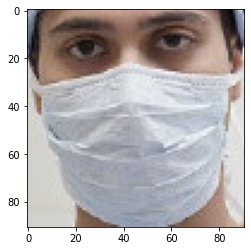

In [ ]:
#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TEST,'M_1.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

Image have shape: (189, 189, 3)


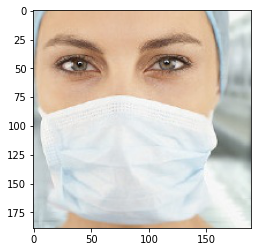

In [ ]:
#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_101.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

#**PREPROCESSING DATA AND SPLITTEING TRAINSET AND VALID SET**

Using TensorFlow backend.


Mask #1 as image:


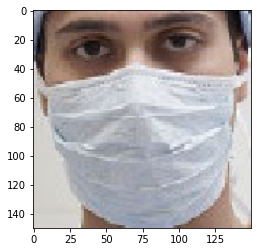

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def loadAndResizeImage (img, w, h):
    '''
    loads the image in 'img' path and returns a PIL image of size (w,h)
    '''
    return image.load_img (img, target_size=(w,h))

# Mask example resized
mask_index = 1
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_'+str(mask_index)+'.jpg')
sample_img = loadAndResizeImage (sample_img_path, IMG_SHAPE[0], IMG_SHAPE[1])
plt.imshow(sample_img)
print ('Mask #'+str(mask_index)+' as image:')

In [ ]:
from PIL import Image

def getLabel (X):
    """
    Return the label for an element based on the filename: 
        mask -> 1 
        non_mask -> 0
    """
    if ('M' in X):
        return 1
    else:
        return 0
    
def getLabels (X):
    """
    Returns an array that contains the label for each X
    """
    return np.array([getLabel(X[i]) for i in range(len(X))])

def getLabelFromScore (score):
    """
    Returns the label based on the probability
    if score >= 0.5, return 'mask'
    else return 'non_mask'
    """
    if (score >=0.5):
        return 'M'
    else:
        return 'N'

def normalizedArrayFromImageInPath (image_path, img_shape):
    """
    returns an the image in 'image' path normalized in an np array
    """
    img = loadAndResizeImage (image_path, img_shape[0], img_shape[1])
    return image.img_to_array(img) / 255.

def loadResizeNormalizeImages (basepath, path_array, img_shape):
    """
    Loads the images from the path 
    and returns them in an array
    """
    images = np.empty ((len(path_array), img_shape[0], img_shape[1], img_shape[2]), dtype=np.float32)
    for i in range (len(path_array)):
        images[i] = normalizedArrayFromImageInPath (os.path.join(basepath,path_array[i]), img_shape)
    return images

In [ ]:
#CREATE TRAINING AND VALIDATION SETS
import os
import numpy as np

train_imgs = os.listdir(DIR_IMG_TRAIN)
train_imgs.sort()

#TRAIN VALID TEST: 70 10 20 => TOTAL ~ 5000

#Training data have 3500 img
train_x = np.append(train_imgs[:1750],train_imgs[-1750:])
train_y = getLabels (train_x)

print ("Number of training examples = {}".format(len(train_x)))
print ("Number of training labels = {}".format(len(train_y)))

#Validation data have 500 img 
validation_x = np.append(train_imgs[1750:2000],train_imgs[-2000:-1750])
validation_y = getLabels (validation_x)

print ("Number of validation examples = {}".format (len(validation_x)))
print ("Number of validation labels = {}".format(len(validation_y)))

Number of training examples = 3500
Number of training labels = 3500
Number of validation examples = 500
Number of validation labels = 500


In [ ]:
#CHECKPOINT 
img_train_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, train_x, IMG_SHAPE)
np.save (os.path.join(DIR_TMP_DATA,'train_x'), img_train_x)
print (img_train_x.shape)
print ('Input X for training saved!')

img_validation_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, validation_x, IMG_SHAPE)
np.save (os.path.join(DIR_TMP_DATA,'validation_x'), img_validation_x)
print (img_validation_x.shape)
print ('Input X for validation saved!')

print ('Checkpoint 1')

KeyboardInterrupt: ignored

In [ ]:
#PROPORTION
def MaskVsNon_MaskProportion (labels):
    N = 0
    M = 0
    for label in labels:
        if (label == 1):
            M = M + 1
        else:
            N = N + 1

    N_percent = (N/len(labels))*100.0
    M_percent = 100.0 - N_percent

    return M_percent, N_percent

In [ ]:
import numpy as np
img_train_x = np.load (os.path.join(DIR_TMP_DATA,'train_x')+'.npy')
img_validation_x = np.load (os.path.join(DIR_TMP_DATA,'validation_x')+'.npy')

M, N = MaskVsNon_MaskProportion (train_y)
print ("--> Training set: Non Mask represent "+str(N)+"% of the total")
print ("    Mask represent "+str(M))

M, N = MaskVsNon_MaskProportion (validation_y)
print ("--> Validation set: Non Mask represent "+str(N)+"% of the total")
print ("    Non Mask represent "+str(M))

--> Training set: Non Mask represent 50.0% of the total
    Mask represent 50.0
--> Validation set: Non Mask represent 50.0% of the total
    Non Mask represent 50.0


#**BUILDING MODEL**

In [ ]:
#BUILDING THE MODEL
#Hide Warning tensorflow
#--------
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#---------
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150,3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
non_dense_predictions = Dense(1, activation='sigmoid')(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# add dropout
x = Dropout (0.5)(x)
# one fully connected layer more
x = Dense(256, activation='relu')(x)
# add dropout
x = Dropout (0.3)(x)
# one fully connected layer more
x = Dense(32, activation='relu')(x)
# and a logistic layer --
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

87916544/87910968 [==============================] - 7s 0us/step


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

#**TRAINING**

In [ ]:
model.fit (x=img_train_x, y=train_y, 
           batch_size=16, epochs=10, 
           validation_data=(img_validation_x, validation_y))

Train on 3500 samples, validate on 500 samples
Epoch 1/10
3500/3500 [==============================] - 218s 62ms/step - loss: 0.5447 - accuracy: 0.7563 - val_loss: 0.5678 - val_accuracy: 0.8100
Epoch 2/10
3500/3500 [==============================] - 219s 62ms/step - loss: 0.3782 - accuracy: 0.8406 - val_loss: 0.2537 - val_accuracy: 0.8940
Epoch 3/10
3500/3500 [==============================] - 216s 62ms/step - loss: 0.3279 - accuracy: 0.8563 - val_loss: 0.1883 - val_accuracy: 0.9220
Epoch 4/10
3500/3500 [==============================] - 215s 62ms/step - loss: 0.3157 - accuracy: 0.8649 - val_loss: 0.1992 - val_accuracy: 0.9300
Epoch 5/10
3500/3500 [==============================] - 216s 62ms/step - loss: 0.2987 - accuracy: 0.8849 - val_loss: 0.3372 - val_accuracy: 0.9080
Epoch 6/10
3500/3500 [==============================] - 213s 61ms/step - loss: 0.3055 - accuracy: 0.8663 - val_loss: 0.1850 - val_accuracy: 0.9320
Epoch 7/10
3500/3500 [==============================] - 213s 61ms/step 

#**SAVING AND LOADING KERRAS MODEL** 

In [ ]:
#Save model
print ('Saving the model...')
model.save(os.path.join(DIR_OUTPUT,'model-10ep.h5'))
print ('Model saved! Filename: {}'.format (os.path.join(DIR_OUTPUT,'model-10ep-.h5')))
print ('Checkpoint 2')

Saving the model...
Model saved! Filename: /content/drive/My Drive/MAFA-Crop/models/model-10ep-.h5
Checkpoint 2


In [ ]:
#Loadig Model
from keras.models import load_model
model = load_model('/content/drive/My Drive/MAFA-Crop/models/model-10ep.h5')
print ('Model loaded!')

Model loaded!


#**EVALUATION**

In [ ]:
#Evaluation with test images the model didn't see before

#Test set original have 500 img

test_imgs = os.listdir(DIR_IMG_TEST)
test_imgs.sort
test_x = np.append(test_imgs[:500],test_imgs[-500:])
test_y = getLabels (test_x)

print ("Number of test set images= "+str(len(test_x)))
print ("Number of test set labels = "+str(len(test_y)))

print ("First element of test set "+test_x[0])
print ("Label of first element of test set = "+str(test_y[0]))

Number of test set images= 1000
Number of test set labels = 1000
First element of test set M_1381.jpg
Label of first element of test set = 1


In [ ]:
print(test_x)

['M_1381.jpg' 'M_1411.jpg' 'M_1439.jpg' 'M_1425.jpg' 'M_1396.jpg'
 'M_1454.jpg' 'M_1370.jpg' 'M_1468.jpg' 'M_1497.jpg' 'M_1484.jpg'
 'M_1382.jpg' 'M_1412.jpg' 'M_1440.jpg' 'M_1397.jpg' 'M_1426.jpg'
 'M_1371.jpg' 'M_1455.jpg' 'M_1469.jpg' 'M_1498.jpg' 'M_1383.jpg'
 'M_1485.jpg' 'M_1413.jpg' 'M_1441.jpg' 'M_1398.jpg' 'M_1456.jpg'
 'M_1470.jpg' 'M_1427.jpg' 'M_1372.jpg' 'M_1499.jpg' 'M_1384.jpg'
 'M_1486.jpg' 'M_1442.jpg' 'M_1399.jpg' 'M_1414.jpg' 'M_1457.jpg'
 'M_1471.jpg' 'M_1428.jpg' 'M_1500.jpg' 'M_1373.jpg' 'M_1385.jpg'
 'M_1443.jpg' 'M_1487.jpg' 'M_1458.jpg' 'M_1400.jpg' 'M_1415.jpg'
 'M_1472.jpg' 'M_1429.jpg' 'M_1386.jpg' 'M_1444.jpg' 'M_1501.jpg'
 'M_1488.jpg' 'M_1374.jpg' 'M_1459.jpg' 'M_1401.jpg' 'M_1416.jpg'
 'M_1473.jpg' 'M_1430.jpg' 'M_1387.jpg' 'M_1445.jpg' 'M_1502.jpg'
 'M_1489.jpg' 'M_1510.jpg' 'M_1460.jpg' 'M_1417.jpg' 'N_1402.jpg'
 'M_1474.jpg' 'M_1388.jpg' 'M_1431.jpg' 'M_1490.jpg' 'M_1446.jpg'
 'M_1503.jpg' 'M_1475.jpg' 'M_1403.jpg' 'M_1461.jpg' 'M_1418.jpg'
 'M_1511.j

In [ ]:

img_test_x = loadResizeNormalizeImages (DIR_IMG_TEST, test_x, IMG_SHAPE)
print (img_test_x.shape)

KeyboardInterrupt: ignored

In [ ]:
print ('Saving test set...')
np.save (os.path.join(DIR_TMP_DATA,'test_x'), img_test_x)
print ('Input X for test saved!')
print ('Checkpoint 3')

Saving test set...
Input X for test saved!
Checkpoint 3


In [ ]:
img_test_x = np.load (os.path.join(DIR_TMP_DATA,'test_x')+'.npy')
print ('Input X for evaluation loaded!')

# check the proportion organic vs recyclable
M, N = MaskVsNon_MaskProportion (test_y)

print ("--> Test set: Non Mask represent "+str(N)+"% of the total")
print ("    Mask represent "+str(M)+"%")

Input X for evaluation loaded!
--> Test set: Non Mask represent 10.6% of the total
    Mask represent 89.4%


In [ ]:
preds = model.evaluate (x=img_test_x, y=test_y, batch_size=10)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1000/1000 [==============================] - 60s 60ms/step

Loss = 0.463357504807791
Test Accuracy = 0.8519999980926514


# **PREDICT**

In [ ]:
def predictFromImg (img):
    x = np.expand_dims(img, axis=0)
    return model.predict(x)[0][0]

In [ ]:
#CAMERA CAPTURE
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


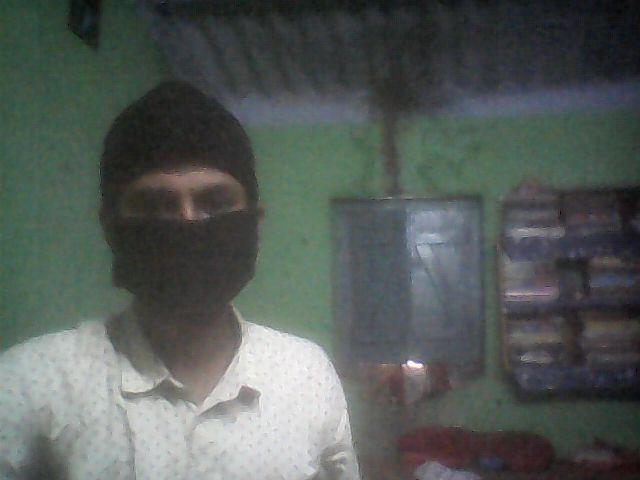

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#FOR SHWOING CV2 IMAGES IN COLAB
from google.colab.patches import cv2_imshow

Prediction took 0.083 seconds
It's a M! (with a score of 1.0) 0 -> Mask / 1 ->Non Mask


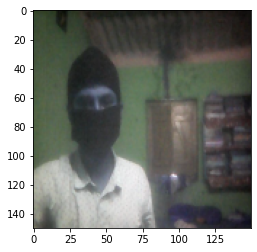

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
dim=(150,150)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#cv2_imshow(img)
start = time.time()
score = predictFromImg(resized)
end = time.time()
print("Prediction took {:.3f} seconds".format (end - start))
print("It's a {}! (with a score of {}) 0 -> Mask / 1 ->Non Mask".format (getLabelFromScore (score), score))
plt.imshow(resized)

In [ ]:
import numpy as np
import cv2
display_img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
img = np.array(display_img)
img = cv2.resize(img,(150,150))
img = img/255.0
score = predictFromImg(img)
print(score)

0.9562639


In [ ]:
import cv2
import time

wt=150
tt=640
pp=640

tP=640
cP=0
cM=0
cZ=0
c255=0
fC=0

mWF=False
coF=False
pF=False


cap = cv2.VideoCapture(r'C:\Users\hp\Pictures\long.mp4')
_, frame1 = cap.read()
frame1=cv2.resize(frame1,(640,640))
_, frame2 = cap.read()
frame2=cv2.resize(frame2,(640,640))
th1=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
_, th1 = cv2.threshold(th1, 170, 255, cv2.THRESH_BINARY)
th1=cv2.resize(th1,(40,40))
fC+=2

start=time.time()
end=time.time()
dS=time.time()
dE=time.time()
mCS=time.time()
mCE=time.time()
print(th1.shape)
key=1

while (cap.isOpened()):



    if((mCE-mCS)>8):
        mCS = time.time()
        mCE = time.time()
        cM=0

    cZ = 0
    c255 = 0

    for i in range(40):
        for j in range(40):
            if(th1[i][j]==0):
                cZ+=1
            elif(th1[i][j]==255):
                c255+=1

    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    ctrs, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)




    ctrsf = []
    ctrsff=[]

    for contour in ctrs:

        (x, y, w, h) = cv2.boundingRect(contour)
        if (cv2.contourArea(contour)) < 1000 or (cv2.contourArea(contour)) > 2500:
            continue
        else:
            ctrsf.append(contour)

    for contour in ctrsf:
        flag=True
        (x, y, w, h) = cv2.boundingRect(contour)
        if (len(ctrsff) == 0):
            ctrsff.append(contour)
        else:
            for cnt in ctrsff:
                xi,yi,wi,hi=cv2.boundingRect(cnt)
                if (abs(x - xi) <= wt):
                    flag=False
                    break
                else:
                    continue
            if(flag):
                ctrsff.append(contour)

    xm=640
    for cnt in ctrsff:
        (x, y, w, h) = cv2.boundingRect(cnt)
        if(x<xm):
            xm=x
    if (abs(xm - tP) < 251):
        cP = cP + 1
    else:
        cP=0

    if (cP == 3):
        cP = 0
        pp = tP

    tP=xm


    if((not(pF)) and (pp < 450) ):
        pF=True
        dS=time.time()
    elif((pF) and (pp>500) and (pp < 639)):
        pF=False

    end = time.time()
    mCE=time.time()

    if(len(ctrsff)>1):
        cM = cM + 1
        print("cM: "+str(cM))
        if(cM==3):
            mWF=True

    cv2.arrowedLine(frame1,(635,250),(430,250),(255,0,0),10)
    cv2.putText(frame1, "ATM Entrance", (430, 230), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0, 0), 2)


    if(c255<300 or cZ<300):
        cv2.putText(frame1, "Camera View Obstructed", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif(mWF):
        cv2.putText(frame1,"Multiple Person Detected",(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(frame1, "Press \'d\' to resume", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        cv2.putText(frame1, "Time elapsed: "+str(end-start), (10, 170), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
    elif(pF and abs(end-dS)>80):
        cv2.putText(frame1, "Person is taking unusually long time", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(frame1, "Time elapsed: " + str(end - start), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
    elif (pF):
        cv2.putText(frame1, "Person Detected inside ATM", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.putText(frame1, "Time elapsed: " + str(end - start), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    else:
        cv2.putText(frame1, "Press ESC to terminate: ", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.putText(frame1, "Time elapsed: " + str(end - start), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)


    cv2.imshow("live", frame1)
    frame1 = frame2
    _, frame2 = cap.read()
    frame2 = cv2.resize(frame2, (640, 640))

    th1=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    _, th1 = cv2.threshold(th1, 170, 255, cv2.THRESH_BINARY)
    th1 = cv2.resize(th1, (40, 40))
    fC+=1
    print(fC)


    k=cv2.waitKey(key)
    if (k == 27):
        break
    elif (k == ord('d')):
        mWF=False
        cM=0
cap.release()
cv2.destroyAllWindows()





error: ignored